In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.io as sp
import matplotlib.transforms as transforms

In [4]:
pred = ["A", "B", "¬A", "¬B", "A ∩ B", "A ∩ ¬B", "¬A ∩ B", "¬A ∩ ¬B", "A ∪ B", "A ∪ ¬B", "¬A ∪ B", "¬A ∪ ¬B",
       "A|B", "A|¬B", "¬A|B", "¬A|¬B", "B|A", "B|¬A","¬B|A", "¬B|¬A"]

In [5]:
data_names = ["exp1_frosty","exp1_normal", "exp2_cloudy", "exp2_rainy", "exp2_snowy"]

# Load Data and Model Fits

In [16]:
data_MS = {}
for name in data_names:
    data_MS[name] = sp.loadmat(name + "_data_Ms.mat")['Ms_data_all']

In [17]:
BS_MS = {}
for name in data_names:
    BS_MS[name] = sp.loadmat(name + "_bs_Ms.mat")['Ms_all']

In [18]:
QSS_MS = {}
for name in data_names:
    QSS_MS[name] = sp.loadmat(name + "_Ms.mat")['Ms_all']

# Create Table For Plot

In [29]:
mean_tab = {"subject":[], "rating": [], "type": [], "pred": [], "name":[]}
for data_name in data_names:
    for i in range(0, len(pred)):
        for j in range(0,data_MS[data_name].shape[0]):
            mean_tab["subject"].append(j)
            mean_tab["rating"].append(data_MS[data_name][j,i])
            mean_tab["pred"].append(pred[i])
            mean_tab["type"].append("data")
            mean_tab["name"].append(data_name)
            mean_tab["subject"].append(j)
            mean_tab["rating"].append(BS_MS[data_name][j,i])
            mean_tab["pred"].append(pred[i])
            mean_tab["type"].append("BS")
            mean_tab["name"].append(data_name)
            mean_tab["subject"].append(j)
            mean_tab["rating"].append(QSS_MS[data_name][j,i])
            mean_tab["pred"].append(pred[i])
            mean_tab["type"].append("QSS")
            mean_tab["name"].append(data_name)

In [30]:
mean_tab = pd.DataFrame(mean_tab)
mean_tab

,subject,rating,type,pred,name
0,0,15.000000,data,A,exp1_frosty
1,0,22.533811,BS,A,exp1_frosty
2,0,60.543329,QSS,A,exp1_frosty
3,1,15.000000,data,A,exp1_frosty
4,1,34.527280,BS,A,exp1_frosty
...,...,...,...,...,...
22195,82,45.131332,BS,¬B|¬A,exp2_snowy
22196,82,42.175742,QSS,¬B|¬A,exp2_snowy
22197,83,78.333333,data,¬B|¬A,exp2_snowy
22198,83,90.570559,BS,¬B|¬A,exp2_snowy


# Make Mean Plots

### Note: The data is fitted with a rounding mechanism into 5s and 10s, in response to the response bias presented in the data. The prediction, which is computed as the expected value of the best fit parameters, may look slightly different compared to that in Zhu et al. (2020), though the general trend is the same, as can be seen by comparing the below plots with that shown in Zhu et al. (2020).

In [31]:
mean_plot_tab = {"tab":{}, "mean":{}}

In [32]:
for name in mean_tab["name"].unique():
    mean_plot_tab["tab"][name] = {}
    mean_plot_tab["mean"][name] = {}
    for m in mean_tab["type"].unique():
        model_tab = mean_tab[mean_tab["name"] == name]
        model_tab = model_tab[model_tab["type"] == m]
        mean_plot_tab["tab"][name][m] = model_tab
        means = []
        for p in model_tab['pred'].unique():
            pred_tab = model_tab[model_tab["pred"] == p]
            #Compute Means
            means.append(np.mean(pred_tab["rating"]))
        mean_plot_tab["mean"][name][m] = means

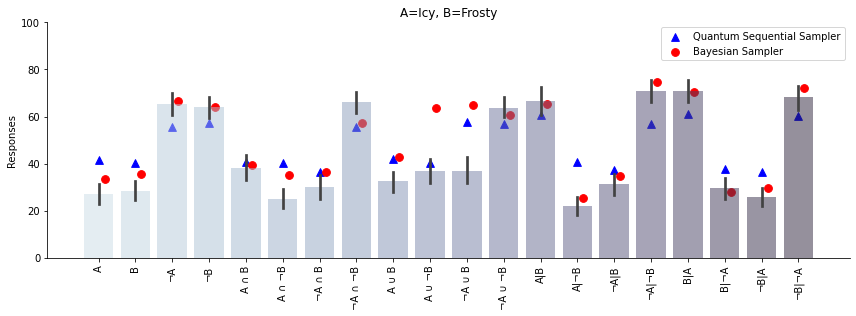

In [39]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["exp1_frosty"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Icy, B=Frosty")
plt.scatter(mean_plot_tab["tab"]["exp1_frosty"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["exp1_frosty"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["exp1_frosty"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["exp1_frosty"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_exp1_frosty.jpg",dpi = 500)

In [33]:
mean_plot_tab["mean"]

{'exp1_frosty': {'data': [27.05649717514124,
   28.412429378531073,
   65.42937853107344,
   63.88135593220339,
   38.23728813559321,
   25.090395480225986,
   30.045197740112997,
   66.09604519774011,
   32.395480225988706,
   36.864406779661024,
   36.84745762711865,
   63.76271186440676,
   66.54802259887005,
   21.881355932203395,
   31.338983050847453,
   71.0169491525424,
   70.89265536723164,
   29.497175141242938,
   25.740112994350284,
   68.23163841807907],
  'BS': [33.58962199236959,
   35.75295779440078,
   66.41037800763043,
   64.24704220559923,
   39.24216858017263,
   35.081957337076325,
   36.49013110756067,
   57.22750782688607,
   42.77249217311393,
   63.50986889243932,
   64.91804266292367,
   60.757831419827376,
   65.1382543934027,
   25.21807576983827,
   34.86174560659728,
   74.78192423016172,
   70.24997001702725,
   28.047145943258244,
   29.750029982972745,
   71.95285405674174],
  'QSS': [41.71713848728642,
   40.204815849335134,
   55.71951889464744,
   5

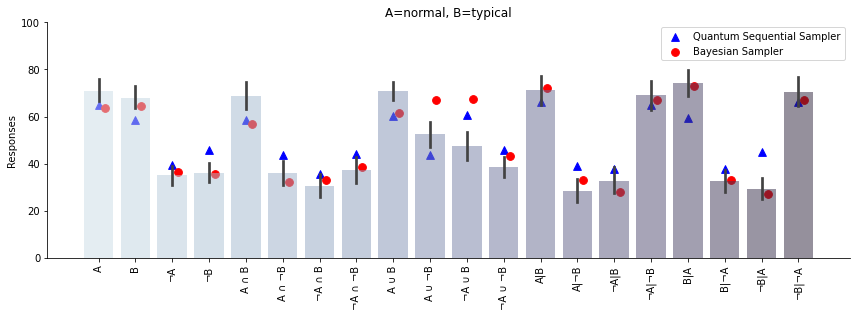

In [40]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["exp1_normal"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=normal, B=typical")
plt.scatter(mean_plot_tab["tab"]["exp1_normal"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["exp1_normal"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["exp1_normal"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["exp1_normal"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_exp1_normal.jpg",dpi = 500)

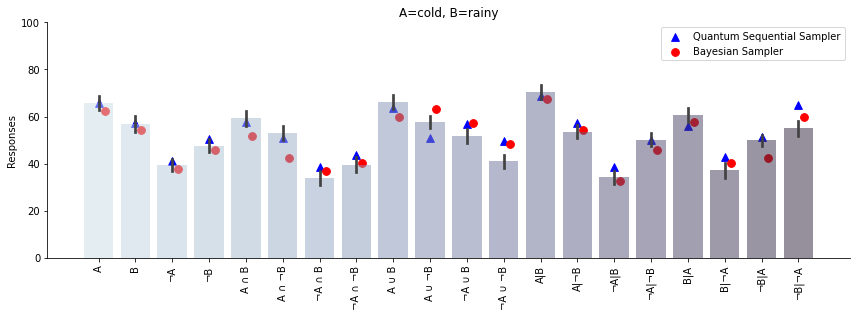

In [42]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["exp2_rainy"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=cold, B=rainy")
plt.scatter(mean_plot_tab["tab"]["exp2_rainy"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["exp2_rainy"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["exp2_rainy"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["exp2_rainy"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_exp2_rainy.jpg",dpi = 500)

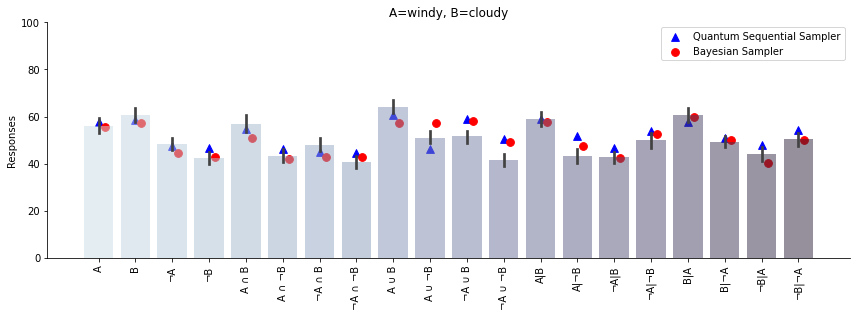

In [51]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["exp2_cloudy"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=windy, B=cloudy")
plt.scatter(mean_plot_tab["tab"]["exp2_cloudy"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["exp2_cloudy"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["exp2_cloudy"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["exp2_cloudy"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_exp2_cloudy.jpg",dpi = 500)

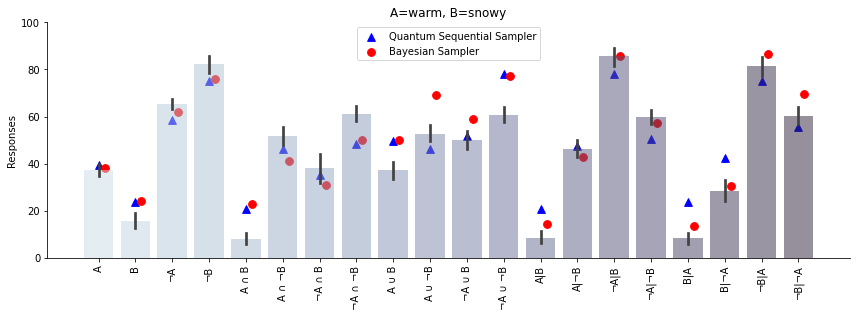

In [44]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["exp2_snowy"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=warm, B=snowy")
plt.scatter(mean_plot_tab["tab"]["exp2_snowy"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["exp2_snowy"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["exp2_snowy"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["exp2_snowy"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_exp2_snowy.jpg",dpi = 500)

# Make Probability Identity

In [45]:
violin_plot_tab = {"tab":{}}

In [46]:
for name in mean_tab["name"].unique():
    violin_plot_tab["tab"][name] = {}
    model_tab = mean_tab[mean_tab["name"] == name]
    for m in mean_tab["type"].unique():
        for n in mean_tab["type"].unique():
            if n != "data" and n != m:
                model_tab = model_tab[model_tab["type"] != n]
        violin_plot_tab["tab"][name][m] = model_tab
        model_tab = mean_tab[mean_tab["name"] == name]

## Bayesian Sampler

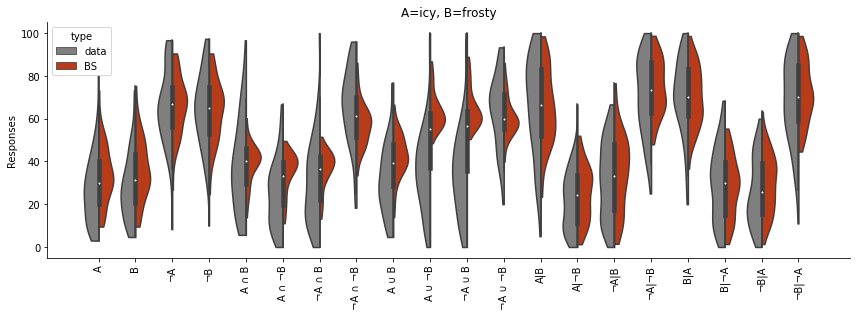

In [48]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["exp1_frosty"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=icy, B=frosty")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_exp1_frosty_BS.jpg", dpi = 500)

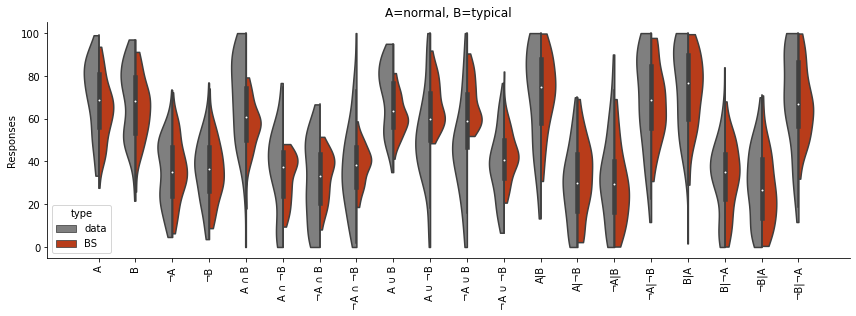

In [108]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["exp1_normal"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=normal, B=typical")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_exp1_normal_BS.jpg", dpi = 500)

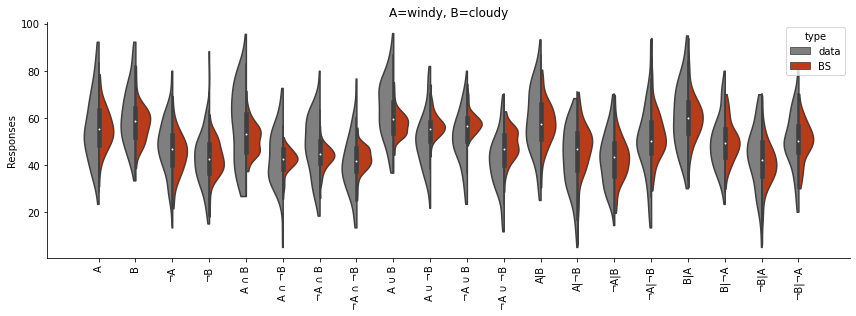

In [52]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["exp2_cloudy"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=windy, B=cloudy")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_exp2_cloudy_BS.jpg", dpi = 500)

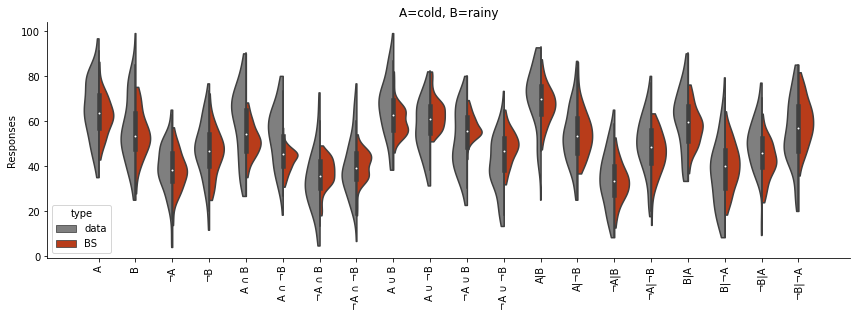

In [54]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["exp2_rainy"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=cold, B=rainy")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_exp2_rainy_BS.jpg", dpi = 500)

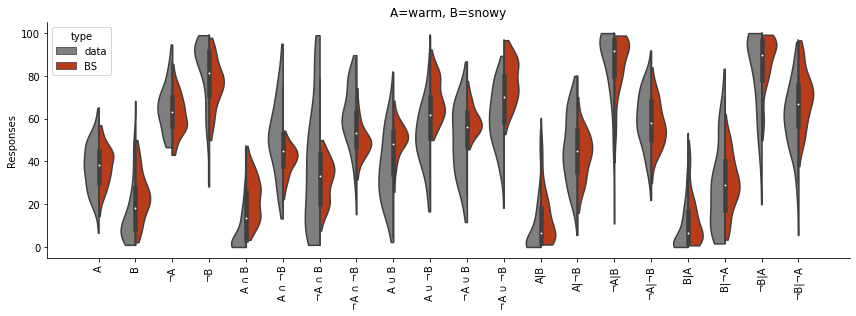

In [55]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["exp2_snowy"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=warm, B=snowy")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_exp2_snowy_BS.jpg", dpi = 500)

## Quantum Sequential Sampler

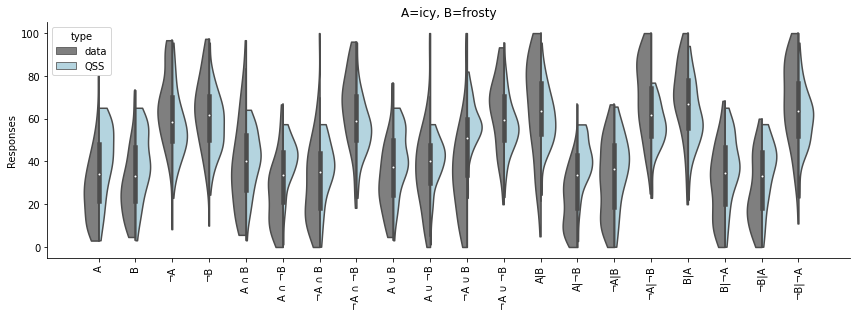

In [58]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["exp1_frosty"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=icy, B=frosty")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_exp1_frosty_QSS.jpg", dpi = 500)

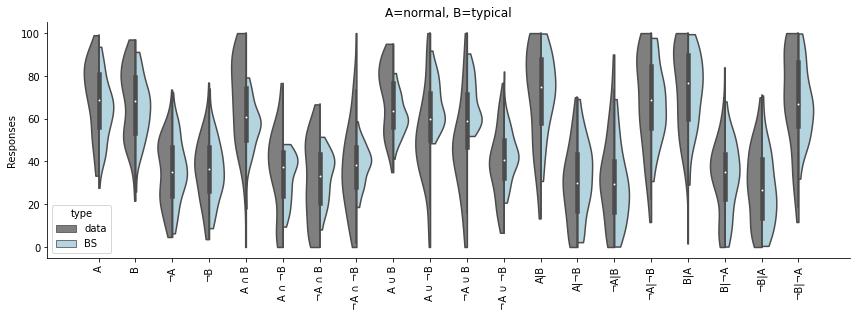

In [107]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["exp1_normal"]["BS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=normal, B=typical")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_exp1_normal_QSS.jpg", dpi = 500)

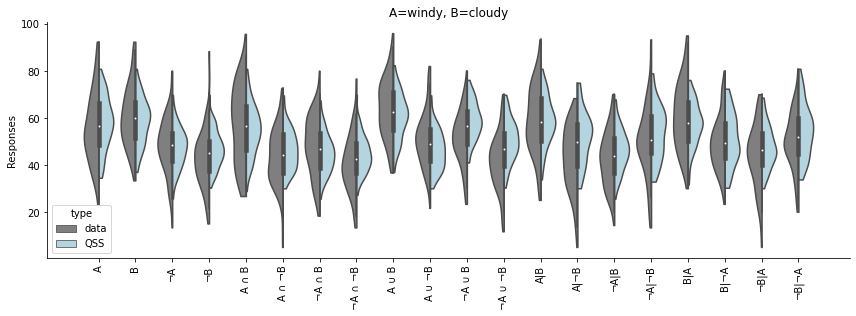

In [60]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["exp2_cloudy"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=windy, B=cloudy")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_exp2_cloudy_QSS.jpg", dpi = 500)

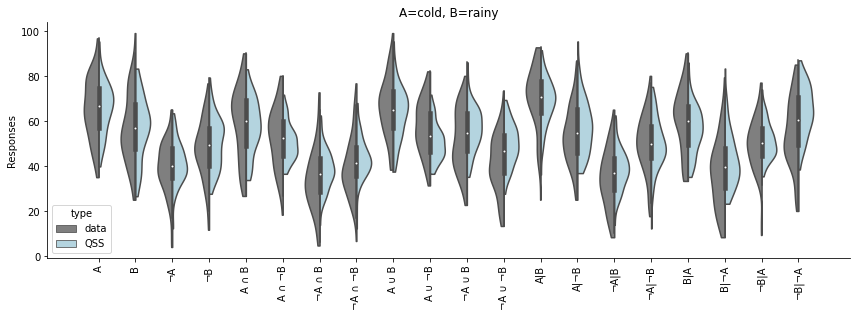

In [61]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["exp2_rainy"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=cold, B=rainy")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_exp2_rainy_QSS.jpg", dpi = 500)

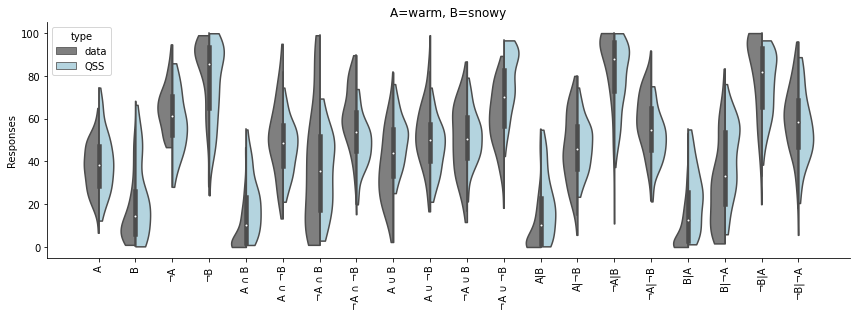

In [63]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["exp2_snowy"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=warm, B=snowy")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_exp2_snowy_QSS.jpg", dpi = 500)

# Make Identity Plots

In [64]:
zn = [(["P(A)","P(B)", "P(A ∩ B)", "P(A ∪ B)"],["+", "-", "-"]),(["P(A)","P(B ∩ ¬A)", "P(B)", "P(A ∩ ¬B)"],["+", "-", "-"]),(["P(A)","P(B ∩ ¬A)","P(A ∪ B)"],["+","-"]),
     (["P(B)","P(A ∩ ¬B)","P(A ∪ B)"],["+","-"]),(["P(A ∩ ¬B)","P(A ∩ B)","P(A)"],["+","-"]),(["P(B ∩ ¬A)","P(A ∩ B)","P(B)"],["+","-"]),
     (["P(A ∩ ¬B)","P(B ∩ ¬A)", "P(A ∩ B)", "P(A ∪ B)"],["+", "+", "-"]),(["P(A ∩ ¬B)","P(B ∩ ¬A)", "P(A ∩ B)", "P(A)", "P(B)"],["+", "+2*", "-", "-"]),
    (["P(A|B)","P(B)", "P(B|A)", "P(A)"],["*", "-", "*"]), (["P(A|B)","P(B)", "P(A|¬B)", "P(¬B)", "P(A)"],["*", "+", "*", "-"]), 
    (["P(B|A)","P(A)", "P(B|¬A)", "P(¬A)", "P(B)"],["*", "+", "*", "-"]), (["P(B|A)","P(A)", "P(A|¬B)", "P(¬B)", "P(A)"],["*", "+", "*", "-"]), 
    (["P(A|B)","P(B)", "P(B|¬A)", "P(¬A)", "P(B)"],["*", "+", "*", "-"]),(["P(A|¬B)", "P(¬B)", "P(B)", "P(B|¬A)", "P(¬A)", "P(A)"],["*", "+", "-", "*", "-"]),
    (["P(A ∩ B)", "P(A|B)", "P(B)"],["-", "*"]),(["P(A ∩ B)", "P(B|A)", "P(A)"],["-", "*"]),(["P(A ∩ B)", "P(A)", "P(A|¬B)", "P(¬B)"],["-", "+", "*"]),
    (["P(A ∩ B)", "P(B)", "P(B|¬A)", "P(¬A)"],["-", "+", "*"])]

In [65]:
identity_plot_tab = {"tab":{}}
for name in mean_tab["name"].unique():
    identity_plot_tab["tab"][name] = {}
    for m in mean_tab["type"].unique():
        model_tab = mean_tab[mean_tab["name"] == name]
        model_tab = model_tab[model_tab["type"] == m]
        identity_plot_tab["tab"][name][m] = model_tab

In [85]:
def replace_name(zname):
    zname = zname.replace("P(", "")
    zname = zname.replace(")", "")
    if "∩" in zname:
        #If in the identity B is before A, we swap A to be before B to match the pred names in the mean tab.
        if zname.find("B") < zname.find("A"):
            zname_swap = zname.replace(" ", "")
            swap_list = zname_swap.split("∩")
            swap_list.append("∩")
            zname = swap_list[1] + " " + swap_list[2] + " " + swap_list[0]
    if "∪" in zname:
        if zname.find("B") < zname.find("A"):
            zname_swap = zname.replace(" ", "")
            swap_list = zname_swap.split("∪")
            swap_list.append("∪")
            zname = swap_list[1] + " " + swap_list[2] + " " + swap_list[0]    
    return zname

In [86]:
def get_z_tab(zn, model_data):
    z_tab = {"subject": [],"rating": [], "type": [], "pred": [], "name":[]}
    for name in mean_tab["name"].unique():
        print("")
        print("")
        print(name)
        model_preds = model_data["tab"][name].keys()
        for m in model_preds:
            print("")
            print(m)
            m_tab = model_data["tab"][name][m]
            #index for identity
            j = 1
            for z in zn:
                print("Z" + str(j))
                for p in m_tab["subject"].unique():
                    p_tab = m_tab[m_tab["subject"] == p]
                    mp_tab = p_tab[p_tab["pred"] == replace_name(z[0][0])]
                    #string that represents the numerical calculation to be evaluated for the identity
                    z_val = str(np.array(mp_tab["rating"])[0]/100)
                    #Loop through the identity calculations (z[0] are the probabilities and z[1] are the operations)
                    for i in range(1,len(z[0])):
                        mp_tab = p_tab[p_tab["pred"] == replace_name(z[0][i])]
                        r = np.array(mp_tab["rating"])[0]/100
                        op = z[1][i-1]
                        #first add the operation, then add the probability, because we already have z[0][0]
                        z_val += op + str(r)
                    z_tab["subject"].append(p)
                    z_tab["rating"].append(100*eval(z_val))
                    z_tab["type"].append(m)
                    z_tab["pred"].append("Z"+str(j))
                    z_tab["name"].append(name)
                j += 1
    return pd.DataFrame(z_tab)

In [87]:
z_tab = get_z_tab(zn, identity_plot_tab)



exp1_frosty

data
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

BS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

QSS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18


exp1_normal

data
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

BS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

QSS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18


exp2_cloudy

data
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

BS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

QSS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18


exp2_rainy

data
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

BS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

QSS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18


exp2_snowy

data
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

BS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13


In [89]:
def zpm_tab(z_tab, name, model):
    zp_tab = z_tab[z_tab["name"] == name]
    return zp_tab[zp_tab["type"] == model]

In [90]:
def mean_rating(z_tab, name, model, pred):
    mean_tab = zpm_tab(z_tab, name, model)
    rating_list = []
    for p in pred:
        mean_tab_p = mean_tab[mean_tab["pred"] == p]
        rating_list.append(np.mean(mean_tab_p["rating"]))
    return rating_list

In [91]:
identities = z_tab["pred"].unique()

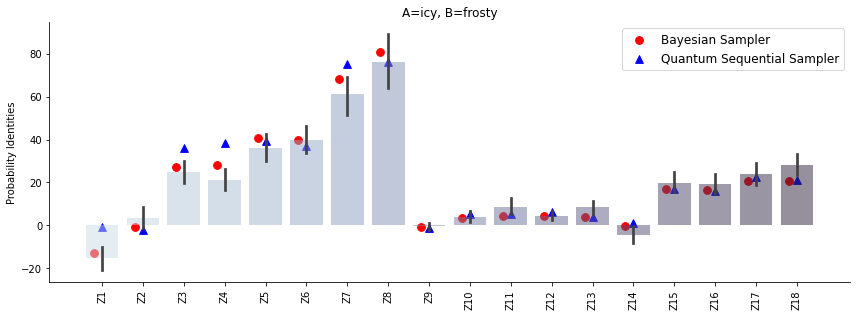

In [94]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "exp1_frosty", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "exp1_frosty", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "exp1_frosty", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("A=icy, B=frosty")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_exp1_frosty.jpg", dpi = 500)

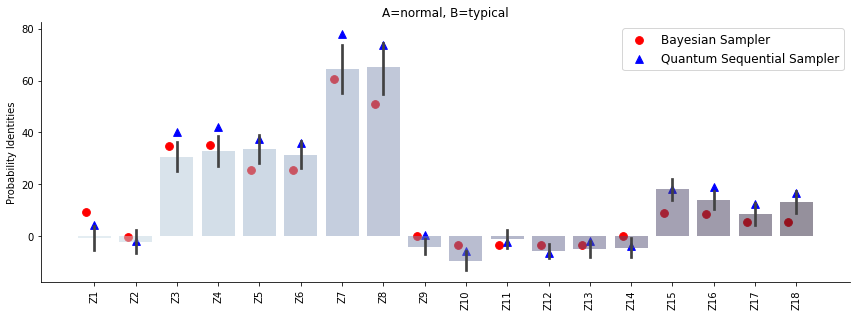

In [102]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "exp1_normal", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "exp1_normal", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "exp1_normal", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("A=normal, B=typical")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_exp1_normal.jpg", dpi = 500)

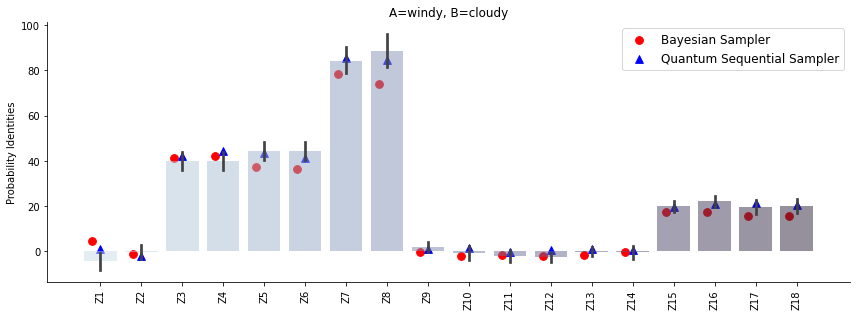

In [103]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "exp2_cloudy", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "exp2_cloudy", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "exp2_cloudy", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("A=windy, B=cloudy")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_exp2_cloudy.jpg", dpi = 500)

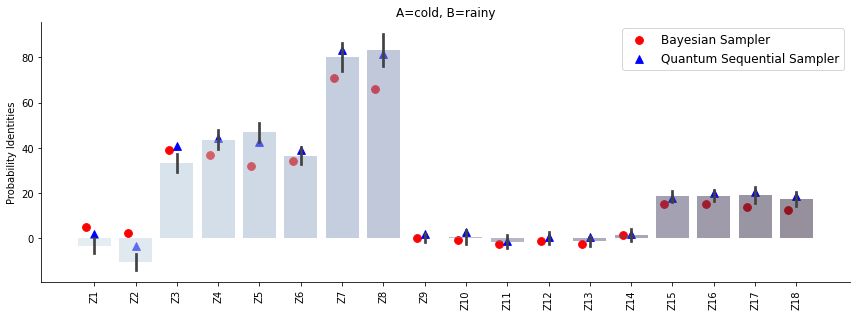

In [104]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "exp2_rainy", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "exp2_rainy", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "exp2_rainy", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("A=cold, B=rainy")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_exp2_rainy.jpg", dpi = 500)

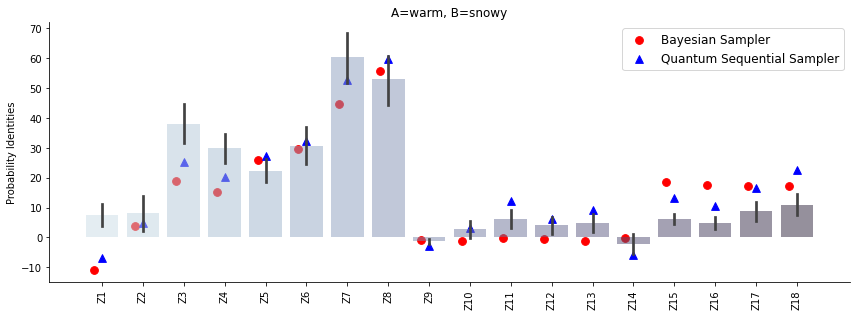

In [106]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "exp2_snowy", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "exp2_snowy", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "exp2_snowy", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("A=warm, B=snowy")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.ylim(-15,72)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_exp2_snowy.jpg", dpi = 500)